In [1]:
# common packages 
import numpy as np 
import os
import copy
from math import *
import matplotlib.pyplot as plt
from functools import reduce
# reading in dicom files
import pydicom
# skimage image processing packages
from skimage import measure, morphology
#from skimage.morphology impo190rt ball, binary_closing
from skimage.measure import label, regionprops
# scipy linear algebra functions 
from scipy.linalg import norm
import scipy.ndimage
# ipywidgets for some interactive plots
from ipywidgets.widgets import * 
import ipywidgets as widgets
# plotly 3D interactive graphs 
import plotly
from plotly.graph_objs import *
#import chart_studio.plotly as py
# set plotly credentials here 
# this allows you to send results to your account plotly.tools.set_credentials_file(username=your_username, api_key=your_key)
import nrrd
import cv2

In [2]:
import os
import shutil

# Percorso della cartella contenente i file
folder_path = "\\Users\\bsbar\\Desktop\\pazienti_nrrd"

# Scansione dei file nella cartella
for filename in os.listdir(folder_path):
    # Percorso completo del file
    file_path = os.path.join(folder_path, filename)
    
    # Verifica se il file è un file regolare e termina con '.nrrd'
    if os.path.isfile(file_path) and filename.endswith('.nrrd'):
        # Estrai il nome della cartella
        folder_name = filename.split('.')[0]
        
        # Crea la cartella se non esiste già
        folder_path_new = os.path.join(folder_path, folder_name)
        if not os.path.exists(folder_path_new):
            os.makedirs(folder_path_new)
        
        # Sposta il file nella cartella creata
        shutil.move(file_path, folder_path_new)
        print(f"Il file '{filename}' è stato spostato nella cartella '{folder_name}'.")

In [2]:
from PIL import Image
import os
import numpy as np
import nrrd

def process_and_save_nrrd_images(pathdicom, pathroi, save_path, keep_original):
    # Dizionario per memorizzare le aree delle ROI
    roi_areas = {}
    
    for s in os.listdir(pathdicom):
        if s == ".DS_Store":
            continue
        #print(s)
        filename = os.path.join(pathdicom, s)
        #print(filename)
        
        # Aggiungi la chiave per il paziente
        roi_areas[s] = {}
        
        for t in os.listdir(filename):
            #print(t)
            if t == ".DS_Store":
                continue
            pathdicomnew = os.path.join(pathdicom, s, t)
            #print(pathdicomnew)
            readdatadicom, header = nrrd.read(pathdicomnew, index_order='C')

        pathroinew = os.path.join(pathroi, s)
        for g in os.listdir(pathroinew):
            if g == ".DS_Store":
                continue
            #print(g)

            troi = os.path.join(pathroi, s, g)
            readdatanrrd, header2 = nrrd.read(troi, index_order='C')

        indici = np.where(np.any(readdatanrrd == 1, axis=(1, 2)))[0]

        aree_bianco = []

        for i in indici:
            area_bianco = np.count_nonzero(readdatanrrd[i] == 1)
            aree_bianco.append(area_bianco)

            # Aggiungi i dati al dizionario
            roi_areas[s][i] = area_bianco

        #media_aree_bianco = np.mean(aree_bianco)

        #print(f"Media delle aree del bianco nel file {s} : {media_aree_bianco}")

        new_folder = os.path.join(save_path, s)
        os.makedirs(new_folder, exist_ok=True)

        for ind in indici:
            bianca = readdatanrrd[ind].copy()
            grigia = readdatadicom[ind].copy()

            if keep_original:
                immagine_risultante = Image.fromarray(grigia.astype(np.uint8))
            else:
                immagine_risultante = Image.fromarray(bianca.astype(np.uint8) * 255, mode='L')
                for i in range(bianca.shape[0]):
                    for j in range(bianca.shape[1]):
                        if bianca[i, j] == 1:
                            immagine_risultante.putpixel((j, i), int(grigia[i, j]))

            str_path = os.path.join(new_folder, f"{s}__{ind}.png")
            immagine_risultante.save(str_path)

    return roi_areas

# Esempio di utilizzo
pathdicom = "\\Users\\bsbar\\Desktop\\pazienti_nrrd"
pathroi = "\\Users\\bsbar\\Desktop\\Tesi\\ROI"
save_path = "\\Users\\bsbar\\Desktop\\Immagini_pazienti_bw"
keep_original = False
roi_areas_bw = process_and_save_nrrd_images(pathdicom, pathroi, save_path, keep_original)

# Stampare il dizionario risultante
print(roi_areas_bw)

#save_path = "\\Users\\bsbar\\Desktop\\Immagini_pazienti_colorati"
#keep_original = True
#roi_areas_col = process_and_save_nrrd_images(pathdicom, pathroi, save_path, keep_original)


{'100': {191: 3, 192: 34, 193: 60, 194: 83, 195: 122, 196: 148, 197: 175, 198: 193, 199: 218, 200: 252, 201: 288, 202: 305, 203: 309, 204: 308, 205: 306, 206: 303, 207: 298, 208: 286, 209: 269, 210: 258, 211: 255, 212: 261, 213: 269, 214: 261, 215: 250, 216: 237, 217: 221, 218: 205, 219: 183, 220: 166, 221: 143, 222: 114, 223: 94, 224: 74, 225: 52, 226: 38, 227: 25, 228: 3}, '101': {215: 53, 216: 92, 217: 115, 218: 158, 219: 194, 220: 237, 221: 269, 222: 323, 223: 383, 224: 445, 225: 494, 226: 525, 227: 520, 228: 513, 229: 502, 230: 507, 231: 523, 232: 563, 233: 621, 234: 632, 235: 595, 236: 559, 237: 547, 238: 530, 239: 507, 240: 491, 241: 473, 242: 457, 243: 441, 244: 414, 245: 375, 246: 343, 247: 310, 248: 272, 249: 245, 250: 211, 251: 190, 252: 163, 253: 139, 254: 114, 255: 80, 256: 44}, '102': {192: 36, 193: 90, 194: 137, 195: 179, 196: 194, 197: 202, 198: 205, 199: 206, 200: 214, 201: 225, 202: 235, 203: 237, 204: 237, 205: 258, 206: 286, 207: 327, 208: 358, 209: 397, 210: 416, 2

In [9]:
import pandas as pd

# Percorso del file CSV
csv_path = r"C:\Users\bsbar\Desktop\Tesi\ThesisPlaques\CSV\data_rad_clin_DEF.csv"

# Leggi il file CSV
df = pd.read_csv(csv_path)

# Estrai la colonna 'label' come vettore (lista)
labels = df['label'].tolist()

print(len(labels))

129


In [13]:
from PIL import Image
import numpy as np
import os

def load_image(image_path):
    return Image.open(image_path)

def find_non_zero_region(image):
    img_array = np.array(image)
    rows = np.any(img_array != 0, axis=1)
    cols = np.any(img_array != 0, axis=0)
    ymin, ymax = np.where(rows)[0][[0, -1]]
    xmin, xmax = np.where(cols)[0][[0, -1]]
    return ymin, ymax, xmin, xmax

def crop_center(image, ymin, ymax, xmin, xmax, target_size=64):
    img_array = np.array(image)
    center_y = (ymin + ymax) // 2
    center_x = (xmin + xmax) // 2
    half_size = target_size // 2
    
    start_y = max(center_y - half_size, 0)
    end_y = min(center_y + half_size, img_array.shape[0])
    start_x = max(center_x - half_size, 0)
    end_x = min(center_x + half_size, img_array.shape[1])
    
    cropped_img = img_array[start_y:end_y, start_x:end_x]
    
    # Ensure the cropped image is 64x64 by padding if necessary
    padded_img = np.zeros((target_size, target_size), dtype=img_array.dtype)
    pad_y = (target_size - cropped_img.shape[0]) // 2
    pad_x = (target_size - cropped_img.shape[1]) // 2
    padded_img[pad_y:pad_y+cropped_img.shape[0], pad_x:pad_x+cropped_img.shape[1]] = cropped_img
    
    return padded_img

def process_saved_images(area_multiplier, areas_dict):
    
    csv_path = r"C:\Users\bsbar\Desktop\Tesi\ThesisPlaques\CSV\data_rad_clin_DEF.csv"
    df = pd.read_csv(csv_path)
    labels = df['label'].tolist()

    root_folder = "C:\\Users\\bsbar\\Desktop\\Immagini_pazienti_bw"

    images = []
    labels_list = []
    total_images_before_removal = 0
    class_images = []
    patients = []

    images_by_patient = []

    dirs = sorted(
        [folder for folder in os.listdir(root_folder) if os.path.isdir(os.path.join(root_folder, folder))],
        key=lambda x: int(x)  # Convert folder names to integers for correct numerical sorting
    )
    
    for i, folder_name in enumerate(dirs):
        folder_path = os.path.join(root_folder, folder_name)
        areas = []
        valid_images = []
        valid_areas = []
        patient_images_original = 0

        for filename in os.listdir(folder_path):
            image_path = os.path.join(folder_path, filename)
            image = load_image(image_path)

            # Crop and center the image
            centered_image = crop_center(image, *find_non_zero_region(image), target_size=64)
            valid_images.append(centered_image)

            try:
                patient_id_str, slice_number_str = filename.split('__')
                patient_id = int(patient_id_str)
                slice_number = int(slice_number_str.split('.')[0])
            except ValueError:
                print("errore")
                continue

            area = areas_dict.get(str(patient_id), {}).get(slice_number, 0)
            areas.append(area)
            valid_areas.append(area)
            patient_images_original += 1
            total_images_before_removal += 1

        if areas:
            max_area = max(areas)
            threshold = area_multiplier * max_area
            patient_images = []

            for k, area in enumerate(valid_areas):
                if area >= threshold:
                    images.append(valid_images[k])
                    labels_list.append(labels[i])
                    patient_images.append(valid_images[k])

            class_images.append(np.array(patient_images))
            patients.append(folder_name)
            images_by_patient.append(np.array(patient_images))

        print(f"Paziente {folder_name}: {patient_images_original} immagini originali, {len(patient_images)} immagini dopo il controllo sull'area.")

    images_array = np.array(images)
    labels_array = np.array(labels_list)
    patients_array = np.array(patients)

    print("Immagini prima della rimozione", total_images_before_removal)
    print("Immagini dopo rimozione", len(images_array))
    print("Numero di pazienti:", len(class_images))
    print("Numeri dei pazienti:", patients_array)

    return images_array, labels_array, patients_array, class_images, images_by_patient

# Esempio di utilizzo
area_multiplier = 0.3
images_array_col, labels_array, patients_array, class_images_col, images_by_patient = process_saved_images(area_multiplier, roi_areas_bw)

Paziente 5: 39 immagini originali, 28 immagini dopo il controllo sull'area.
Paziente 12: 36 immagini originali, 22 immagini dopo il controllo sull'area.
Paziente 15: 49 immagini originali, 39 immagini dopo il controllo sull'area.
Paziente 16: 22 immagini originali, 18 immagini dopo il controllo sull'area.
Paziente 17: 33 immagini originali, 28 immagini dopo il controllo sull'area.
Paziente 19: 29 immagini originali, 22 immagini dopo il controllo sull'area.
Paziente 22: 42 immagini originali, 30 immagini dopo il controllo sull'area.
Paziente 23: 57 immagini originali, 46 immagini dopo il controllo sull'area.
Paziente 24: 51 immagini originali, 48 immagini dopo il controllo sull'area.
Paziente 25: 33 immagini originali, 24 immagini dopo il controllo sull'area.
Paziente 26: 34 immagini originali, 29 immagini dopo il controllo sull'area.
Paziente 27: 60 immagini originali, 48 immagini dopo il controllo sull'area.
Paziente 29: 40 immagini originali, 31 immagini dopo il controllo sull'area.


In [14]:
import h5py
import numpy as np
filename = '\\Users\\bsbar\\Desktop\\images_by_patient_final.h5'

# Apertura del file HDF5 in modalità scrittura
with h5py.File(filename, 'w') as h5f:
    for i, patient_images in enumerate(images_by_patient):
        # Crea un dataset per ogni paziente, ad esempio 'patient_0', 'patient_1', ecc.
        h5f.create_dataset(f'patient_{i}', data=np.array(patient_images))

print(f"Salvato in {filename}")

Salvato in \Users\bsbar\Desktop\images_by_patient_final.h5


In [4]:
labels_file_path = "\\Users\\bsbar\\Desktop\\labels_final.npy"

np.save(labels_file_path, labels_array)

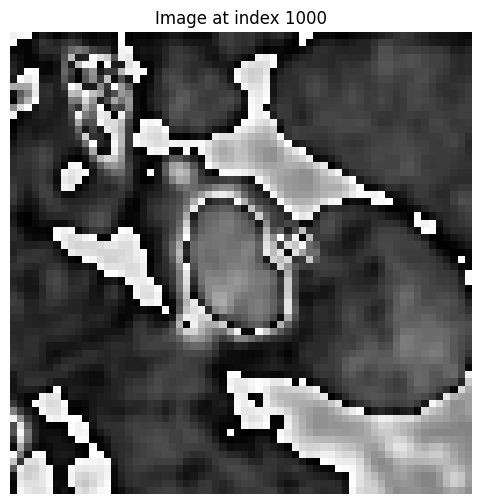

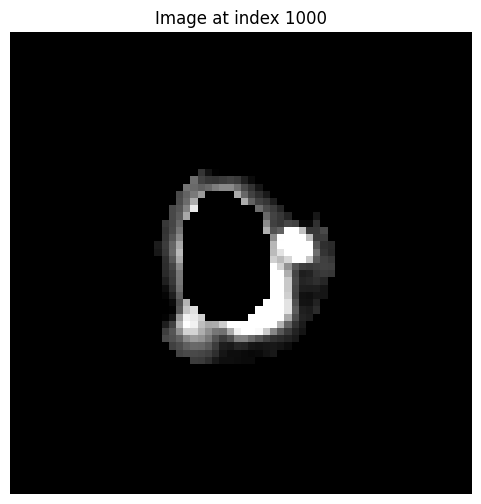

(64, 64)


In [59]:
def display_image_at_index(images_array, index):
    if 0 <= index < len(images_array):
        plt.figure(figsize=(6, 6))
        plt.imshow(images_array[index], cmap='gray')  # Usa 'gray' per immagini in scala di grigi
        plt.title(f'Image at index {index}')
        plt.axis('off')  # Nascondi gli assi
        plt.show()
    else:
        print(f'Index {index} is out of bounds for images_array.')

# Esempio di utilizzo
index = 1000 # Sostituisci con l'indice dell'immagine che vuoi visualizzare
display_image_at_index(images_array_col, index)
display_image_at_index(images_array_bw, index)

print(images_array_col[index].shape)

In [71]:
import numpy as np
import imgaug.augmenters as iaa
from collections import Counter

def augment_images(images_array, labels_array, num_augmented_copies_label_0, num_augmented_copies_label_1):
    # Lista per memorizzare le immagini originali e aumentate
    augmented_images = []
    augmented_labels = []

    # Inizializza l'augmenter
    aug = iaa.Sequential([
        iaa.Fliplr(0.5),  # Ribaltamento orizzontale con probabilità del 50%
        iaa.Flipud(0.5),  # Ribaltamento verticale con probabilità del 50%
        iaa.Affine(rotate=(-10, 10),  # Rotazione casuale tra -10 e 10 gradi
                   translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)},  # Traslazione casuale del 10% su asse x e y
                   order=[0],  # Usa l'ordine originale degli pixels
                   mode='reflect')  # Mode per la trasformazione
    ])

    # Applica l'aumentazione ad ogni immagine
    for image, label in zip(images_array, labels_array):
        # Aggiungi l'immagine originale
        augmented_images.append(image)
        augmented_labels.append(label)

        # Determina il numero di copie da generare in base alla label
        if label == 0:
            num_copies = num_augmented_copies_label_0
        elif label == 1:
            num_copies = num_augmented_copies_label_1

        # Applica l'aumentazione per il numero specificato di copie
        for _ in range(num_copies):
            # Applica l'aumentazione
            augmented_image = aug(image=image)
            # Aggiungi l'immagine aumentata e la stessa label dell'originale
            augmented_images.append(augmented_image)
            augmented_labels.append(label)

    # Converti le liste in array NumPy per l'uso futuro
    augmented_images_array = np.array(augmented_images)
    augmented_labels_array = np.array(augmented_labels)

    # Stampa la dimensione dell'array e il conteggio delle classi
    print("Dimensione del vettore delle immagini aumentate:", augmented_images_array.shape)
    label_counts = Counter(augmented_labels_array)
    print("Conteggio degli elementi per ciascuna classe:", label_counts)

    return augmented_images_array, augmented_labels_array

# Esempio di uso della funzione
num_augmented_copies_label_0 = 15
num_augmented_copies_label_1 = 25
final_images, final_labels = augment_images(images_array_col, labels_array, num_augmented_copies_label_0, num_augmented_copies_label_1)


Dimensione del vettore delle immagini aumentate: (75094, 64, 64)
Conteggio degli elementi per ciascuna classe: Counter({0: 43504, 1: 31590})


In [82]:
seed = 42
import random
random.seed(seed)

final_images = np.random.RandomState(seed).permutation(final_images)
final_labels = np.random.RandomState(seed).permutation(final_labels)

In [83]:
images_file_path = "\\Users\\bsbar\\Desktop\\images_array_col_03.npy"
labels_file_path = "\\Users\\bsbar\\Desktop\\labels_array_col_03.npy"

np.save(images_file_path, final_images)
np.save(labels_file_path, final_labels)

In [89]:
print(type(patients_array))

<class 'numpy.ndarray'>


In [111]:
import h5py

# Percorso del file HDF5 in cui salvare i dati
save_path = os.path.join(os.path.expanduser("~"), "Desktop", "classificator_data_col.h5")

patients_array_new = np.array([s.encode('utf-8') for s in patients_array], dtype='S')
#print(patients_array_new)
# Apre il file HDF5 in modalità scrittura
with h5py.File(save_path, 'w') as hf:
    
    # Salva ciascun array della lista class_images in un gruppo separato
    for i, images_array in enumerate(class_images_col):
        #print(type(images_array))
        # Crea un gruppo per ciascun paziente
        group = hf.create_group(f'patient_{i}')
        # Salva l'array delle immagini nel gruppo come dataset 'images'
        group.create_dataset('images', data=images_array)

    # Salva le etichette nel dataset 'labels'
    hf.create_dataset('labels', data=labels_array)

    # Salva i numeri dei pazienti nel dataset 'patients'
    hf.create_dataset('patients', data=patients_array_new)

print(f"Dati salvati in {save_path}")

Dati salvati in C:\Users\bsbar\Desktop\classificator_data_col.h5


In [116]:
import h5py
import numpy as np
import os

# Percorso del file HDF5 da cui caricare i dati
load_path = os.path.join(os.path.expanduser("~"), "Desktop", "classificator_data_col.h5")

# Inizializza le liste per contenere i dati
loaded_class_images = []
loaded_class_labels = None
loaded_patients = None

# Apre il file HDF5 in modalità lettura
with h5py.File(load_path, 'r') as hf:
    # Itera su tutti i gruppi nel file HDF5
    for group_name in hf.keys():
        # Controlla se il nome del gruppo inizia con "patient_"
        if group_name.startswith("patient_"):
            group = hf[group_name]
            # Carica le immagini dal dataset 'images' all'interno del gruppo
            loaded_class_images.append(np.array(group['images']))
        elif group_name == "labels":
            # Carica le etichette dal dataset 'labels'
            loaded_class_labels = hf['labels'][:]
        elif group_name == "patients":
            # Carica i numeri dei pazienti dal dataset 'patients' e decodifica i byte in stringhe
            patients_array_bytes = hf['patients'][:]
            loaded_patients = [s.decode('utf-8') for s in patients_array_bytes]

print(f"Dati caricati da {load_path}")
print(f"Numero di pazienti: {len(loaded_class_images)}")
print(f"Esempio di immagini per paziente: {loaded_class_images[7].shape}")
print(f"Esempio di numeri dei pazienti: {loaded_patients}")


Dati caricati da C:\Users\bsbar\Desktop\classificator_data_col.h5
Numero di pazienti: 124
Esempio di immagini per paziente: (25, 64, 64)
Esempio di numeri dei pazienti: ['5', '12', '15', '16', '17', '22', '23', '24', '25', '26', '27', '29', '30', '31', '33', '35', '36', '38', '39', '41', '42', '43', '44', '46', '47', '48', '50', '52', '53', '54', '56', '57', '58', '59', '60', '61', '62', '64', '65', '68', '69', '70', '71', '74', '75', '76', '78', '79', '81', '82', '84', '85', '86', '87', '89', '90', '91', '92', '94', '95', '96', '98', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '123', '124', '126', '127', '128', '129', '133', '135', '136', '137', '138', '139', '141', '142', '144', '146', '147', '149', '153', '155', '158', '159', '161', '163', '166', '168', '169', '170', '171', '175', '176', '178', '182', '183', '188', '189', '190', '197', '199', '200', '205']


In [118]:
import h5py

# Percorso del file HDF5 da cui caricare i dati
load_path = os.path.join(os.path.expanduser("~"), "Desktop", "classificator_data_col.h5")

# Inizializza le liste per contenere i dati
loaded_class_images = []
loaded_class_labels = None
loaded_patients = None

# Apre il file HDF5 in modalità lettura
with h5py.File(load_path, 'r') as hf:
    # Itera su tutti i gruppi nel file HDF5
    for group_name in hf.keys():
        # Controlla se il nome del gruppo inizia con "patient_"
        if group_name.startswith("patient_"):
            group = hf[group_name]
            # Carica le immagini dal dataset 'images' all'interno del gruppo
            loaded_class_images.append(np.array(group['images']))
        elif group_name == "labels":
            # Carica le etichette dal dataset 'labels'
            loaded_class_labels = hf['labels'][:]
        elif group_name == "patients":
            # Carica i numeri dei pazienti dal dataset 'patients'
            loaded_patients = hf['patients'][:]

print(f"Dati caricati da {load_path}")
print(f"Numero di pazienti: {len(loaded_class_images)}")
print(f"Esempio di immagini per paziente: {loaded_class_images[0].shape}")
print(f"Esempio di numeri dei pazienti: {loaded_patients}")


Dati caricati da C:\Users\bsbar\Desktop\classificator_data_col.h5
Numero di pazienti: 124
Esempio di immagini per paziente: (28, 64, 64)
Esempio di numeri dei pazienti: [b'5' b'12' b'15' b'16' b'17' b'22' b'23' b'24' b'25' b'26' b'27' b'29'
 b'30' b'31' b'33' b'35' b'36' b'38' b'39' b'41' b'42' b'43' b'44' b'46'
 b'47' b'48' b'50' b'52' b'53' b'54' b'56' b'57' b'58' b'59' b'60' b'61'
 b'62' b'64' b'65' b'68' b'69' b'70' b'71' b'74' b'75' b'76' b'78' b'79'
 b'81' b'82' b'84' b'85' b'86' b'87' b'89' b'90' b'91' b'92' b'94' b'95'
 b'96' b'98' b'100' b'101' b'102' b'103' b'104' b'105' b'106' b'107'
 b'108' b'109' b'110' b'111' b'112' b'113' b'114' b'115' b'116' b'117'
 b'118' b'119' b'120' b'123' b'124' b'126' b'127' b'128' b'129' b'133'
 b'135' b'136' b'137' b'138' b'139' b'141' b'142' b'144' b'146' b'147'
 b'149' b'153' b'155' b'158' b'159' b'161' b'163' b'166' b'168' b'169'
 b'170' b'171' b'175' b'176' b'178' b'182' b'183' b'188' b'189' b'190'
 b'197' b'199' b'200' b'205']


In [54]:
print(type(loaded_class_images[0][1]))

<class 'numpy.ndarray'>


In [16]:
images_file_path = "\\Users\\bsbar\\Desktop\\class_images_array.npy"
labels_file_path = "\\Users\\bsbar\\Desktop\\class_labels_array.npy"
patients_file_path = "\\Users\\bsbar\\Desktop\\patients_array.npy"

np.save(images_file_path, class_images)
np.save(labels_file_path, class_labels)
np.save(patients_file_path, np.array(patients))

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (124,) + inhomogeneous part.

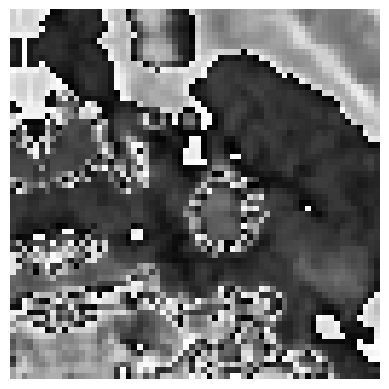

In [81]:

#print(final_images.shape)
#print(final_labels[13])
#print(len(class_images[0]))
plt.imshow(final_images[5679], cmap='gray')
plt.axis('off')
plt.show()

